In [1]:
import math
import random

from PIL import Image, ImageColor
import IPython.display

from Position import Position
from Piece import Piece
from Board import Board
from Game import Game

maxdepth = 4

In [2]:
def heuristic_evaluation(board):
    boardVal = 0
        
    if find_moves(board).__len__()==0:
        boardVal = -500
            
    if find_moves(board.revert()).__len__()==0:
         boardVal = 500
            
    for piece in board.whites:
        if piece.king:
            boardVal += 4
        else:
            boardVal += 1
        
    for piece in board.blacks:
        if piece.king:
            boardVal -= 4
        else:
            boardVal -= 1
                
    return boardVal

In [3]:
def heuristic_evaluation2(board):
    boardVal = 0
        
    if find_moves(board).__len__()==0:
        boardVal = -500
            
    if find_moves(board.revert()).__len__()==0:
         boardVal = 500
            
    for piece in board.whites:
        if piece.king:
            boardVal += 4
        else:
            boardVal += 1
        
    for piece in board.blacks:
        if piece.king:
            boardVal -= 4
        else:
            boardVal -= 1
                
    return boardVal

In [4]:
def find_moves(board):
    possible_moves = []
    
    if board.capture_possible():
        for white in board.whites:
            if not white.king:
                for i in [-1,1]:
                    if board.isBlack(white.position().add(1,i)):
                        if board.isEmpty(white.position().add(2,2*i)):
                            possible_moves.append([white.position(), white.position().add(2,2*i)])
        
            else:
                for xi in [-1, 1]:
                    for yi in [-1, 1]:
                        where = white.position().add(yi, xi)
                    # Go in that direction, until an occuppied field is found or we reach the end of the board
                        while (board.isEmpty(where)):
                            where = where.add(yi, xi)
                        if board.isBlack(where) and board.isEmpty(where.add(yi, xi)):
                            where = where.add(yi, xi)
                            while (board.isEmpty(where)):
                                possible_moves.append([white.position(), where])
                                where = where.add(yi, xi)
                            
                            #todo: add after-skip moves
                
        #todo: add more skips
                            
    else:
        for white in board.whites:
            if not white.king:
                for i in [-1, 1]:         
                    # If a piece is a man, check only if a forward-left or forward-right field is empty
                    if board.isEmpty(white.position().add(1, i)):
                        possible_moves.append([white.position(), white.position().add(1,i)])

            else:
                for xi in [-1, 1]:
                    for yi in [-1, 1]:
                        where = white.position().add(yi, xi)
                        # Go in that direction, until an occuppied field is found or we reach the end of the board
                        while (board.isEmpty(where)):
                            possible_moves.append([white.position(), where])
                            where = where.add(yi, xi)

    return possible_moves

In [5]:
def takeSecond(elem):
    return elem[1]

def makeMove(board, depth, player, prevmove):       #player true for 'us' playing, player false for enemy playing
    possible_moves = find_moves(board)
    evaluations = []
    
    if possible_moves.__len__()==0:
        return [prevmove, heuristic_evaluation(board)]
        
    
    if depth==maxdepth:
        return [prevmove, heuristic_evaluation(board)]
    
    for move in possible_moves:
        newboard = board.make_move(move) 
        nextmove = makeMove(newboard, depth+1, not player, move)
        evaluations.append([move, nextmove[1]])
        
    if player:
        returns = []
        evaluations.sort(key = takeSecond, reverse = True)
        bestev = evaluations[0][1]
        for i in evaluations:
            if i[1] == bestev:
                returns.append(i)
            else:
                break
        
        rand = random.randrange(returns.__len__())
        return returns[rand]
    else:
        returns = []
        evaluations.sort(key = takeSecond, reverse = True)
        bestev = evaluations[0][1]
        for i in evaluations:
            if i[1] == bestev:
                i[1]= -i[1]
                returns.append(i)
            else:
                break
        
        rand = random.randrange(returns.__len__())
        return returns[rand]
    
def makeMove2(board, depth, player, prevmove):       #player true for 'us' playing, player false for enemy playing
    possible_moves = find_moves(board)
    evaluations = []
    
    if possible_moves.__len__()==0:
        return [prevmove, heuristic_evaluation2(board)]
        
    
    if depth==maxdepth:
        return [prevmove, heuristic_evaluation2(board)]
    
    for move in possible_moves:
        newboard = board.make_move(move) 
        nextmove = makeMove(newboard, depth+1, not player, move)
        evaluations.append([move, nextmove[1]])
        
    if player:
        returns = []
        evaluations.sort(key = takeSecond, reverse = True)
        bestev = evaluations[0][1]
        for i in evaluations:
            if i[1] == bestev:
                returns.append(i)
            else:
                break
        
        rand = random.randrange(returns.__len__())
        return returns[rand]
    else:
        returns = []
        evaluations.sort(key = takeSecond, reverse = True)
        bestev = evaluations[0][1]
        for i in evaluations:
            if i[1] == bestev:
                i[1]= -i[1]
                returns.append(i)
            else:
                break
        
        rand = random.randrange(returns.__len__())
        return returns[rand]

In [6]:
class MinMaxBot:
    def make_move(self, board):
        bestmove = makeMove(board = board, depth = 0, player = True, prevmove = 0) 
        rand = random.randrange(bestmove.__len__())
        return bestmove[0]

class MinMaxBot2:
    def make_move(self, board):
        bestmove = makeMove2(board = board, depth = 0, player = True, prevmove = 0) 
        rand = random.randrange(bestmove.__len__())
        return bestmove[0]
    

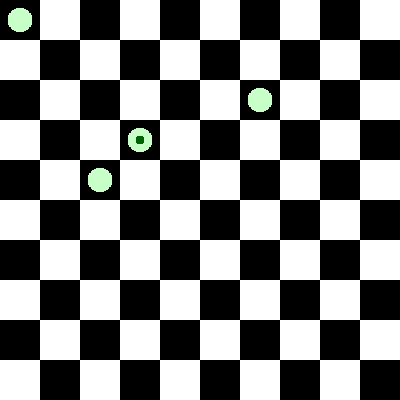

WHITE WINS


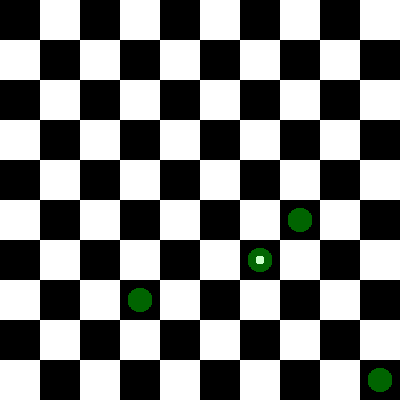

{'moves': [[{'y': 2, 'x': 4}, {'y': 3, 'x': 5}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 9}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 7}],
  [{'y': 1, 'x': 9}, {'y': 2, 'x': 8}],
  [{'y': 1, 'x': 3}, {'y': 2, 'x': 4}],
  [{'y': 0, 'x': 8}, {'y': 1, 'x': 9}],
  [{'y': 1, 'x': 7}, {'y': 2, 'x': 8}],
  [{'y': 2, 'x': 6}, {'y': 3, 'x': 7}],
  [{'y': 3, 'x': 5}, {'y': 4, 'x': 4}],
  [{'y': 3, 'x': 7}, {'y': 4, 'x': 6}],
  [{'y': 4, 'x': 4}, {'y': 6, 'x': 2}],
  [{'y': 2, 'x': 8}, {'y': 4, 'x': 6}],
  [{'y': 0, 'x': 2}, {'y': 1, 'x': 3}],
  [{'y': 2, 'x': 2}, {'y': 3, 'x': 1}],
  [{'y': 2, 'x': 2}, {'y': 3, 'x': 3}],
  [{'y': 4, 'x': 6}, {'y': 5, 'x': 7}],
  [{'y': 3, 'x': 3}, {'y': 5, 'x': 1}],
  [{'y': 3, 'x': 9}, {'y': 5, 'x': 7}],
  [{'y': 2, 'x': 4}, {'y': 3, 'x': 3}],
  [{'y': 5, 'x': 7}, {'y': 7, 'x': 5}],
  [{'y': 1, 'x': 3}, {'y': 3, 'x': 5}],
  [{'y': 1, 'x': 9}, {'y': 2, 'x': 8}],
  [{'y': 2, 'x': 8}, {'y': 3, 'x': 9}],
  [{'y': 1, 'x': 7}, {'y': 2, 'x': 6}],
  [{'y': 3, 'x': 5}, {'y': 4, '

In [7]:
bot = MinMaxBot()
bot2 = MinMaxBot2()
game = Game(bot, bot2)
game.play_bots(True)



## 